
# The irreducible mass of black holes

A rotating black-hole has a region called ergosphere such that infalling particles have negative energy. Penrose imagined a particle that enters that region and decays: half will fall in and half will escape to infinity, carring some energy with it. In a nutshell, we've extracted energy=mass from a black hole! It turns out that one also has to extract angular momentum, not just energy (and here you'll need some GR do to this calculation, see e.g. the famous textbook by Misner, Thorne and Weeler). But angular momentum runs our first, such that a repeated series of Penrose processes leaves behind a non-rotating BH with a remnant mass which is called "irreducible". This is a famous result by Christodoulou 1970 and is closely related to the even more famous area law by Hawking (1971) (which in turns is the foundation of black-hole thermodynamics).

For a BH of mass $M$ and spin $\chi \in [0, 1]$, the irreducible mass is

$$ M_{irr} = M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}} $$ 

For convenience, let us define

$$ f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}} = \frac{M_{irr}}{M} $$ 

Suppose you have repeated measurments of $M$ and $\chi$. This is just because we're still frequentists for now. When we will put our Bayesian hat on, these distributions will be the posterior samples from a single measurement.

Let's assume that
- the spin $\chi$ is uniformly distributed between $0$ and $1$;
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

## Tasks

### Rules of thumb

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu = 1$ in your code and remember that all masses in the problem are measured in units of $\mu$.
2. Plot the resulting pdf of $M_{irr}$. First try an histogram with one of the rules of thumb we've seen above.

Hint: You don't know the functional form of the pdf of $M_{irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity

def f(chi):
    return np.sqrt((1+np.sqrt(1-chi**2))/2)

def kde_sklearn(data, bandwidth, kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis])

    return np.exp(log_pdf)

mu = 1
sigma = 0.02
N = 10000

In [22]:
chi = np.random.uniform(low = 0, high = 1, size = N)
mass = np.random.normal(loc = mu, scale = sigma, size = N)
m_irr = f(chi)*mass

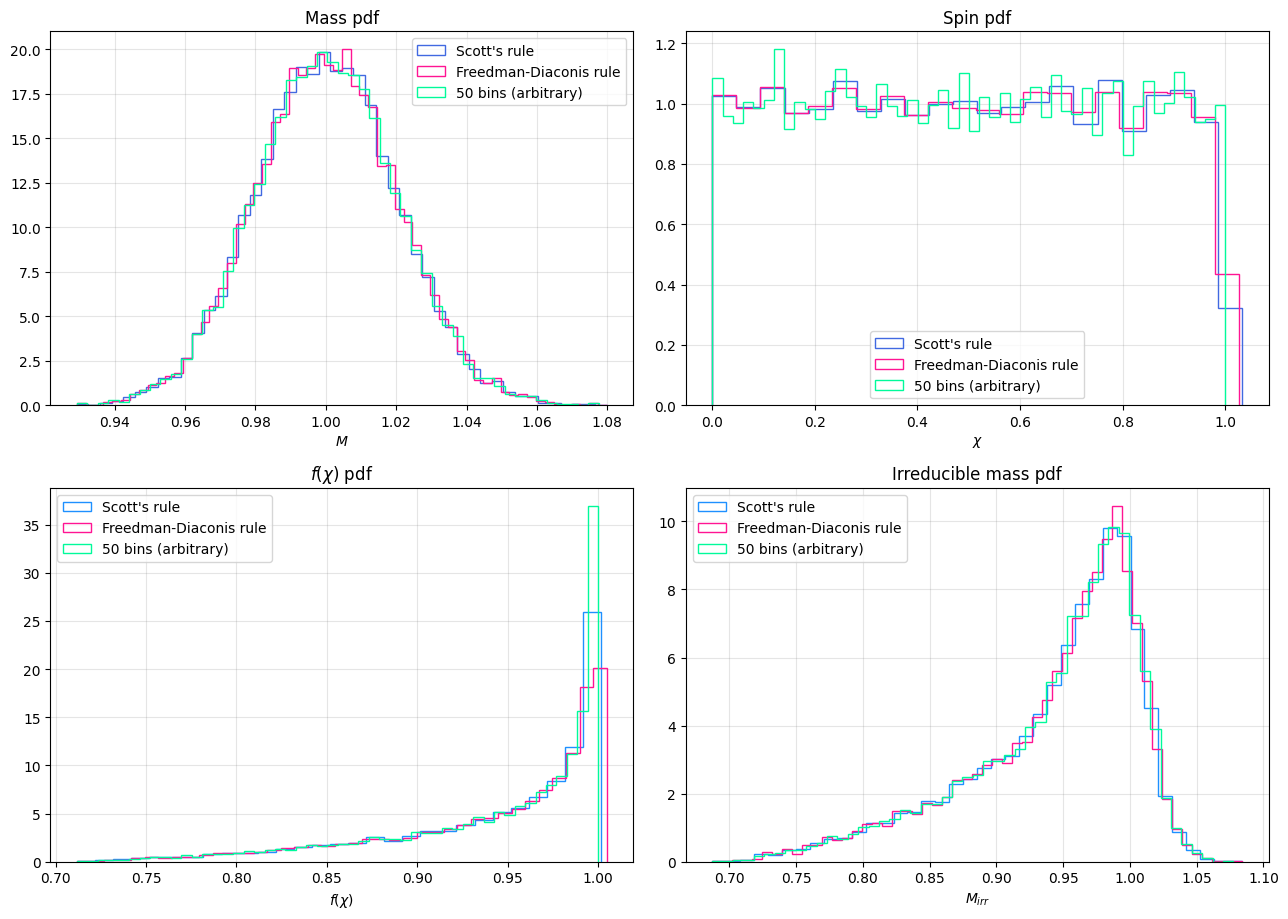

In [38]:
# Representing the histograms with the rules of thumbs

Nbins = 50     # Just to check how the histograms would come out with a number of bins I'd normally use

fig, ax = plt.subplots(2, 2, figsize=(13, 10))

# Mass pdf
fancyhist(mass, bins='scott', density = True, ax = ax[0, 0], histtype = 'step', linewidth = 1,  color = 'royalblue', label="Scott's rule")
fancyhist(mass, bins='freedman', density = True, ax = ax[0, 0], histtype = 'step', linewidth = 1,  color = 'deeppink', label="Freedman-Diaconis rule")
ax[0, 0].hist(mass, bins=Nbins, density = True, histtype = 'step', linewidth = 1,  color = 'mediumspringgreen', label="50 bins (arbitrary)")
ax[0, 0].grid(c='grey', alpha = 0.2)
ax[0, 0].legend()
ax[0, 0].set_xlabel('$M$')
ax[0, 0].set_title('Mass pdf')

# Spin pdf
fancyhist(chi, bins='scott', density = True, ax = ax[0, 1], histtype = 'step', linewidth = 1,  color = 'royalblue', label="Scott's rule")
fancyhist(chi, bins='freedman', density = True, ax = ax[0, 1], histtype = 'step', linewidth = 1,  color = 'deeppink', label="Freedman-Diaconis rule")
ax[0, 1].hist(chi, bins=Nbins, density = True, histtype = 'step', linewidth = 1,  color = 'mediumspringgreen', label="50 bins (arbitrary)")
ax[0, 1].grid(c='grey', alpha = 0.2)
ax[0, 1].legend()
ax[0, 1].set_xlabel('$\\chi$')
ax[0, 1].set_title('Spin pdf')

# f pdf
fancyhist(f(chi), bins='scott', density = True, ax = ax[1, 0], histtype = 'step', linewidth = 1,  color = 'royalblue', label="Scott's rule")
fancyhist(f(chi), bins='freedman', density = True, ax = ax[1, 0], histtype = 'step', linewidth = 1,  color = 'deeppink', label="Freedman-Diaconis rule")
ax[1, 0].hist(f(chi), bins=Nbins, density = True, histtype = 'step', linewidth = 1,  color = 'mediumspringgreen', label="50 bins (arbitrary)")
ax[1, 0].grid(c='grey', alpha = 0.2)
ax[1, 0].legend()
ax[1, 0].set_xlabel('$f(\\chi)$')
ax[1, 0].set_title('$f(\\chi)$ pdf')

# Irreducible mass pdf
fancyhist(m_irr, bins='scott', density = True, ax = ax[1, 1], histtype = 'step', linewidth = 1,  color = 'royalblue', label="Scott's rule")
fancyhist(m_irr, bins='freedman', density = True, ax = ax[1, 1], histtype = 'step', linewidth = 1,  color = 'deeppink', label="Freedman-Diaconis rule")
ax[1, 1].hist(m_irr, bins=Nbins, density = True, histtype = 'step', linewidth = 1,  color = 'mediumspringgreen', label="50 bins (arbitrary)")
ax[1, 1].grid(c='grey', alpha = 0.2)
ax[1, 1].legend()
ax[1, 1].set_xlabel('$M_{irr}$')
ax[1, 1].set_title('Irreducible mass pdf')

plt.subplots_adjust(hspace=0.2)  
plt.tight_layout(rect=[0, 0.05, 1, 0.98], w_pad=1.5)
plt.show()


### KDE

3. Using the same samples, plot the distribution of $M_{irr}$ using a KDE.

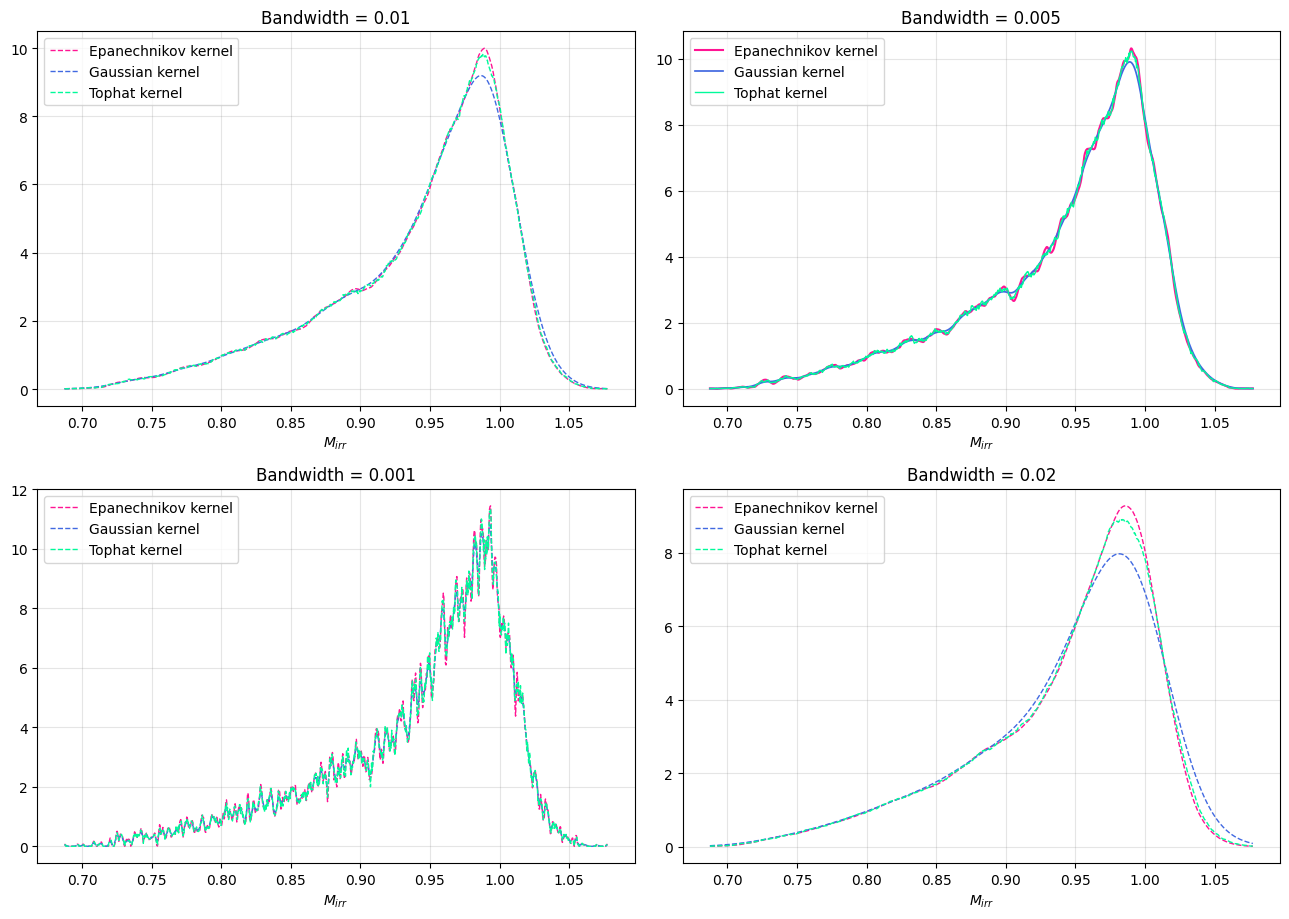

In [42]:
# Confronting three kernels (tophat, gaussian, epanechnikov) and different bandwidths

xgrid = np.linspace(m_irr.min(),m_irr.max(),1000)
bandwidth = [0.01, 0.005, 0.001, 0.02] 
fig, ax = plt.subplots(2, 2, figsize=(13, 10))

#-----------------------------------------------------------------------------------
ax[0, 0].plot(xgrid, kde_sklearn(m_irr,bandwidth=bandwidth[0],kernel="epanechnikov"),
              c = 'deeppink', lw = 1, ls='--', label = 'Epanechnikov kernel')
ax[0, 0].plot(xgrid, kde_sklearn(m_irr,bandwidth=bandwidth[0],kernel="gaussian"),
              c = 'royalblue', lw = 1, ls = '--', label = 'Gaussian kernel')
ax[0, 0].plot(xgrid, kde_sklearn(m_irr,bandwidth=bandwidth[0],kernel="tophat"),
              c = 'mediumspringgreen', lw = 1, ls = '--', label = 'Tophat kernel')
ax[0, 0].grid(c='grey', alpha = 0.2)
ax[0, 0].legend()
ax[0, 0].set_title('Bandwidth = ' + str(bandwidth[0]))
ax[0, 0].set_xlabel('$M_{irr}$')

#-----------------------------------------------------------------------------------
ax[0, 1].plot(xgrid, kde_sklearn(m_irr,bandwidth=bandwidth[1],kernel="epanechnikov"),
              c = 'deeppink', lw = 1.5, label = 'Epanechnikov kernel')
ax[0, 1].plot(xgrid, kde_sklearn(m_irr,bandwidth=bandwidth[1],kernel="gaussian"),
              c = 'royalblue', lw = 1.25, label = 'Gaussian kernel')
ax[0, 1].plot(xgrid, kde_sklearn(m_irr,bandwidth=bandwidth[1],kernel="tophat"),
              c = 'mediumspringgreen', lw = 1, label = 'Tophat kernel')
ax[0, 1].grid(c='grey', alpha = 0.2)
ax[0, 1].legend()
ax[0, 1].set_title('Bandwidth = ' + str(bandwidth[1]))
ax[0, 1].set_xlabel('$M_{irr}$')

#-----------------------------------------------------------------------------------
ax[1, 0].plot(xgrid, kde_sklearn(m_irr,bandwidth=bandwidth[2],kernel="epanechnikov"),
              c = 'deeppink', lw = 1, ls='--', label = 'Epanechnikov kernel')
ax[1, 0].plot(xgrid, kde_sklearn(m_irr,bandwidth=bandwidth[2],kernel="gaussian"),
              c = 'royalblue', lw = 1, ls = '--', label = 'Gaussian kernel')
ax[1, 0].plot(xgrid, kde_sklearn(m_irr,bandwidth=bandwidth[2],kernel="tophat"),
              c = 'mediumspringgreen', lw = 1, ls = '--', label = 'Tophat kernel')
ax[1, 0].grid(c='grey', alpha = 0.2)
ax[1, 0].legend()
ax[1, 0].set_title('Bandwidth = ' + str(bandwidth[2]))
ax[1, 0].set_xlabel('$M_{irr}$')

#-----------------------------------------------------------------------------------
ax[1, 1].plot(xgrid, kde_sklearn(m_irr,bandwidth=bandwidth[3],kernel="epanechnikov"),
              c = 'deeppink', lw = 1, ls='--', label = 'Epanechnikov kernel')
ax[1, 1].plot(xgrid, kde_sklearn(m_irr,bandwidth=bandwidth[3],kernel="gaussian"),
               c = 'royalblue', lw = 1, ls = '--', label = 'Gaussian kernel')
ax[1, 1].plot(xgrid, kde_sklearn(m_irr,bandwidth=bandwidth[3],kernel="tophat"),
              c = 'mediumspringgreen', lw = 1, ls = '--', label = 'Tophat kernel')
ax[1, 1].grid(c='grey', alpha = 0.2)
ax[1, 1].legend()
ax[1, 1].set_title('Bandwidth = ' + str(bandwidth[3]))
ax[1, 1].set_xlabel('$M_{irr}$')

plt.subplots_adjust(hspace=0.2)  
plt.tight_layout(rect=[0, 0.05, 1, 0.98], w_pad=1.5)
plt.show()

In [ ]:
# FINISCI, SCEGLIENDO CON CROSS-VALIDATION LA BANDWIDTH MIGLIORE. 
# CERCA DI TROVARE UN MODO PER RENDERE VISIBILI LE COSE CHE COSI' SI CAPISCE POCO. 
# RICORDA DI METTERE IN ORDINE L'ARRAY DELLE BANDWIDTH.